In [2]:
import os
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

emotion_labels = ['happy', 'sad', 'relaxed', 'angry']
emotion_labels_dict = {'happy': 0, 'sad': 1, 'relaxed': 2, 'angry': 3}

In [3]:
moodyLyrics4Q = pd.read_csv('../database/MoodyLyrics4Q.csv')
print(moodyLyrics4Q.shape)

(2000, 4)


In [4]:
moodyLyrics4Q.describe()

,index,artist,title,mood
count,2000,2000,2000,2000
unique,2000,1291,1978,4
top,ML1,Slayer,Fire,happy
freq,1,26,3,500


In [5]:
duplicatedCheck = moodyLyrics4Q.groupby(['artist','title']).size().reset_index(name='count')
duplicatedRows = duplicatedCheck [(duplicatedCheck ['count']>1)]
print(duplicatedRows.shape)

(0, 3)


There is no duplicated songs - that's good news ;)

In [6]:
input_path = os.path.join('..', 'database', 'lyrics')
lyric_files = [os.path.join(input_path, pos_json) for pos_json in os.listdir(input_path) if pos_json.endswith('.json')]

In [7]:
instrumental = 0
lyric_empty = 0
maualy_downloaded = 0

for file in lyric_files:
    with open(file) as f:
        song_info = json.load(f)
        try:
            lyric = song_info['song']['lyrics']
            if lyric == "":
                print(f"For {file}")
                try:
                    instrumental += 1
                    print(song_info['song']['//coment'])
                except:
                    print("There is no comment")
        except:
            lyric_empty += 1
            print(f"For {file}, lyric is empty")
        
        try:
            lyric = song_info['song']['url']
        except:
            print(f"For {file}, url is empty")
        
        try:
            type = song_info['song']['artist']
        except:
            maualy_downloaded += 1
            print(f"For {file}")
            print('this song is maualy downloaded')

For ..\database\lyrics\ML1159_Yanni_Nostalgia.json
This song is an instrumental
For ..\database\lyrics\ML1159_Yanni_Nostalgia.json
this song is maualy downloaded
For ..\database\lyrics\ML1230_Nightmares On Wax_Flip Ya Lid.json
This song is an instrumental
For ..\database\lyrics\ML1230_Nightmares On Wax_Flip Ya Lid.json
this song is maualy downloaded
For ..\database\lyrics\ML1336_Kool - The Gang_Summer Madness.json
This song is an instrumental
For ..\database\lyrics\ML1336_Kool - The Gang_Summer Madness.json
this song is maualy downloaded
For ..\database\lyrics\ML1349_Miles Davis_Summertime.json
This song is an instrumental
For ..\database\lyrics\ML1349_Miles Davis_Summertime.json
this song is maualy downloaded
For ..\database\lyrics\ML136_Jaromír Nohavica_Ještě mi scházíš.json
this song is maualy downloaded
For ..\database\lyrics\ML1948_Cocteau Twins_Squeeze-Wax.json
this song is maualy downloaded
For ..\database\lyrics\ML379_Eric Clapton_Reptile.json
This song is an instrumental
For .

In [8]:
print(f"There are {instrumental} instrumental songs\n"
      f"There are {lyric_empty} songs with empty lyrics\n"
      f"There are {maualy_downloaded} maualy downloaded songs\n")

There are 5 instrumental songs
There are 0 songs with empty lyrics
There are 7 maualy downloaded songs



In [9]:
import os
import sys
import pathlib

current_dir = pathlib.Path().absolute()
sys.path.append(os.path.dirname(current_dir))
from tools.download_songs import read_config
from tools.download_lyrics import authorize_genius, download_lyric


def download_single_song(title, artist, file):
        
        config = read_config(os.path.join('..', 'config', 'genius_secrets.json'))

        genius = authorize_genius(config)


        downloaded_song, _ = download_lyric(genius, title, artist)
        song_info = downloaded_song.to_dict()

        print(song_info)

        with open(file) as f:
                song = json.load(f)
                f.close()

        song['song'] = song_info

        with open(file, 'w') as f:
                f.write(json.dumps(song, indent=4))
                f.close()

# "lyrics": "",
# "url": "https://genius.com/Miles-davis-summertime-lyrics",
# "//coment": "This song is an instrumental"

In [10]:
title = 'Insomnia'
artist = 'Tyler Hilton'
file = '..\database\lyrics\ML606_Tyler Hilton_Insomnia -Revised Album Version-.json'

# if needed execute this fun
# download_single_song(title, artist, file)

In [11]:
rows = list()
ids = list()

for file_path in lyric_files:
    with open(file_path) as f:
        song_info = json.load(f)
        
        try:
            id = song_info['id']
            id = id.replace("ML", "")
            id = int(id)
        except:
            id = None
            print(f"For {file_path} there is no id")

        try:
            mood = song_info['mood']
        except:
            mood = None
            print(f"For {file_path} there is no mood")
        
        try:
            artist = song_info['artist']
        except:
            artist = None
            print(f"For {file_path} there is no artist")

        try:
            title = song_info['title']
        except:
            title = None
            print(f"For {file_path} there is no title")
        
        try:
            genius_artist = song_info['song']['artist']
        except:
            genius_artist = None
            print(f"For {file_path} there is no genius_artist")

        try:
            genius_title = song_info['song']['title']
        except:
            genius_title = None
            print(f"For {file_path} there is no genius_title")

        try:
            lyric = song_info['song']['lyrics']
        except:
            lyric = None
            print(f"For {file_path} there is no lyrics")
        
        try:
            language = song_info['song']['language']
        except:
            print(f"For {file_path} there is no language")

        try:
            url = song_info['song']['url']
        except:
            print(f"For {file_path} there is no url")

        try:
            _ = song_info['song']['//coment']
            instrumental = True
        except:
            instrumental = False

    row = (mood, artist, genius_artist, title, genius_title, 
           lyric, language, instrumental, url, file_path)
    rows.append(row)
    ids.append(id)


df = pd.DataFrame(rows, columns=['mood', 'artist', 'genius_artist',
                  'title', 'genius_title', 'lyric', 'language',
                  'instrumental', 'url', 'file_path'], index=ids)

For ..\database\lyrics\ML1159_Yanni_Nostalgia.json there is no genius_artist
For ..\database\lyrics\ML1159_Yanni_Nostalgia.json there is no genius_title
For ..\database\lyrics\ML1159_Yanni_Nostalgia.json there is no language
For ..\database\lyrics\ML1230_Nightmares On Wax_Flip Ya Lid.json there is no genius_artist
For ..\database\lyrics\ML1230_Nightmares On Wax_Flip Ya Lid.json there is no genius_title
For ..\database\lyrics\ML1230_Nightmares On Wax_Flip Ya Lid.json there is no language
For ..\database\lyrics\ML1336_Kool - The Gang_Summer Madness.json there is no genius_artist
For ..\database\lyrics\ML1336_Kool - The Gang_Summer Madness.json there is no genius_title
For ..\database\lyrics\ML1336_Kool - The Gang_Summer Madness.json there is no language
For ..\database\lyrics\ML1349_Miles Davis_Summertime.json there is no genius_artist
For ..\database\lyrics\ML1349_Miles Davis_Summertime.json there is no genius_title
For ..\database\lyrics\ML1349_Miles Davis_Summertime.json there is no l

In [12]:
df = df.sort_index()
df.head(10)


,mood,artist,genius_artist,title,genius_title,lyric,language,instrumental,url,file_path
1,happy,George Michael,George Michael,I Want Your Sex,I Want Your Sex,I Want Your Sex Lyrics[From a PSA recorded for...,en,False,https://genius.com/George-michael-i-want-your-...,..\database\lyrics\ML1_George Michael_I Want Y...
2,angry,Rob Zombie,Rob Zombie,Pussy Liquor,Pussy Liquor,Pussy Liquor LyricsBaby :\nGimme a B\nGimme a ...,en,False,https://genius.com/Rob-zombie-pussy-liquor-lyrics,..\database\lyrics\ML2_Rob Zombie_Pussy Liquor...
3,sad,Katatonia,Katatonia,12,12,12 Lyrics[Chorus]\nBlack theatre of love\nViol...,en,False,https://genius.com/Katatonia-12-lyrics,..\database\lyrics\ML3_Katatonia_12.json
4,happy,Bing Crosby,Bing Crosby,Swinging On A Star,Swinging On a Star,Swinging On a Star Lyrics[Chorus: Bing Crosby ...,en,False,https://genius.com/Bing-crosby-swinging-on-a-s...,..\database\lyrics\ML4_Bing Crosby_Swinging On...
5,angry,Ludacris,Ludacris,Get Back,Get Back,"Get Back Lyrics[Intro]\nHeads up! (woop, woop)...",en,False,https://genius.com/Ludacris-get-back-lyrics,..\database\lyrics\ML5_Ludacris_Get Back.json
6,angry,Hole,Hole,Violet,Violet,Violet Lyrics[Verse 1]\nAnd the sky was made o...,en,False,https://genius.com/Hole-violet-lyrics,..\database\lyrics\ML6_Hole_Violet.json
7,angry,Manic Street Preachers,Manic Street Preachers,Ifwhiteamericatoldthetruthforonedayit'sworldwo...,Ifwhiteamericatoldthetruthforonedayit’sworldwo...,Ifwhiteamericatoldthetruthforonedayit’sworldwo...,en,False,https://genius.com/Manic-street-preachers-ifwh...,..\database\lyrics\ML7_Manic Street Preachers_...
8,sad,Emerson Hart,Emerson Hart,If You're Gonna Leave,If You’re Gonna Leave,If You’re Gonna Leave LyricsMaybe I'm the joke...,en,False,https://genius.com/Emerson-hart-if-youre-gonna...,..\database\lyrics\ML8_Emerson Hart_If You're ...
9,angry,Megadeth,Megadeth,Architecture of Aggression,Architecture of Aggression,Architecture of Aggression Lyrics[Verse 1]\nBo...,en,False,https://genius.com/Megadeth-architecture-of-ag...,..\database\lyrics\ML9_Megadeth_Architecture o...
10,happy,Blondie,Blondie,Heart of Glass,Heart of Glass,Heart of Glass Lyrics[Verse 1]\nOnce I had a l...,en,False,https://genius.com/Blondie-heart-of-glass-lyrics,..\database\lyrics\ML10_Blondie_Heart of Glass...


In [13]:
df.describe()

,mood,artist,genius_artist,title,genius_title,lyric,language,instrumental,url,file_path
count,2000,2000,1993,2000,1993,2000,1991,2000,2000,2000
unique,4,1291,1277,1978,1968,1987,16,2,1991,2000
top,happy,Slayer,Slayer,Fire,Fire,,en,False,https://genius.com/Rage-against-the-machine-ki...,..\database\lyrics\ML1_George Michael_I Want Y...
freq,500,26,26,3,3,5,1895,1994,2,1


In [14]:
count_artist = 0

for index, row in df.iterrows():
    if row['artist'] != row['genius_artist']:
        count_artist += 1
        print(f"For {index} artists are not the same")
        print(f"{row['artist']} != {row['genius_artist']}\n")


print(f"\nThere are {count_artist} songs with different artist names\n")

For 12 artists are not the same
The Tallest Man on Earth != The Tallest Man On Earth

For 32 artists are not the same
Lamb != Lamb (UK)

For 33 artists are not the same
Nickleback != Nickelback

For 48 artists are not the same
Helena Bonham Carter & Johnny Depp != Johnny Depp & Helena Bonham Carter

For 55 artists are not the same
Emiliana Torrini != Emilíana Torrini

For 65 artists are not the same
Bachman-Turner Overdrive != Bachman–Turner Overdrive

For 67 artists are not the same
System of a Down != System Of A Down

For 74 artists are not the same
COLD != Cold

For 76 artists are not the same
Ania != Ania Dąbrowska

For 85 artists are not the same
The Jam != ​The Jam

For 88 artists are not the same
Deborah Harry != Debbie Harry

For 98 artists are not the same
Longing for Dawn != Longing For Dawn

For 116 artists are not the same
Móveis Coloniais de Acaju != Móveis Coloniais De Acaju

For 122 artists are not the same
Café Tacuba != Café Tacvba

For 136 artists are not the same
Ja

In [15]:
count_titles = 0

for index, row in df.iterrows():
    if row['title'] != row['genius_title']:
        count_titles += 1
        print(f"For {index} artists are not the same")
        print(f"{row['title']} != {row['genius_title']}\n")
    

print(f"\n {count_titles}")
print(f"\nThere are {count_titles} songs with different title\n")


For 4 artists are not the same
Swinging On A Star != Swinging On a Star

For 7 artists are not the same
Ifwhiteamericatoldthetruthforonedayit'sworldwouldfallapart != Ifwhiteamericatoldthetruthforonedayit’sworldwouldfallapart

For 8 artists are not the same
If You're Gonna Leave != If You’re Gonna Leave

For 15 artists are not the same
I'm On My Way != I’m on My Way

For 20 artists are not the same
Never Went to Church != Never Went To Church

For 23 artists are not the same
The Tide Began To Rise != The Tide Began to Rise

For 27 artists are not the same
Don't Give Up != Don’t Give Up

For 50 artists are not the same
Life Is A Pigsty != Life Is a Pigsty

For 55 artists are not the same
Jungle Drums != Jungle Drum

For 57 artists are not the same
Bees & butterflies != Bees & Butterflies

For 65 artists are not the same
Roll On Down The Highway != Roll On Down the Highway

For 66 artists are not the same
Gimme All Your Lovin' != Gimme All Your Lovin’

For 68 artists are not the same
Feue

In [16]:
count_lyrics = 0
for index, row in df.iterrows():
    if row['lyric'] == "" and row['instrumental'] == False:
        count_lyrics += 1
        print(f"For {index} lyric is empty\n")


print(f"\nThere are {count_lyrics} songs with empty lirics\n")


There are 0 songs with empty lirics



In [17]:
languages = {
                'en' : 0,       #english
                'None' :0,      #none
                'de' : 0,       #german
                'es' : 0,       #spanish
                'fi' : 0,       #finish
                'fr' : 0,       #french
                'ga' : 0,       #irish
                'gd' : 0,       #gealish/scotish
                'id' : 0,       #indonesian
                'it' : 0,       #italian
                'ja' : 0,       #japaniese
                'no' : 0,       #norwegian
                'pl' : 0,       #polish
                'pt' : 0,       #portuguese
                'ro' : 0,       #romanian
                'sv' : 0,       #swedish
                'tr' : 0}       #turkish

languages_abreviation = {
                'en' : 'english',
                'None' : 'none',
                'de' : 'german',
                'es' : 'spanish',
                'fi' : 'finish',
                'fr' : 'french',
                'ga' : 'irish',
                'gd' : 'gealish/scotish',
                'id' : 'indonesian',
                'it' : 'italian',
                'ja' : 'japaniese',
                'no' : 'norwegian',
                'pl' : 'polish',
                'pt' : 'portuguese',
                'ro' : 'romanian',
                'sv' : 'swedish',
                'tr' : 'turkish'  
}

for index, row in df.iterrows():
    languages[str(row['language'])] += 1

sorted_languages = sorted(languages.items(), key=lambda x:x[1])
not_english_lirics = 0

for key, value in sorted_languages:
    print(f'Detected {value} songs in {languages_abreviation[key]}')
    if key != 'en': not_english_lirics += value

print(f'\nThere are {not_english_lirics} lirics in different languages')

Detected 1 songs in gealish/scotish
Detected 1 songs in indonesian
Detected 1 songs in romanian
Detected 1 songs in turkish
Detected 2 songs in italian
Detected 2 songs in norwegian
Detected 3 songs in irish
Detected 4 songs in japaniese
Detected 4 songs in polish
Detected 4 songs in swedish
Detected 6 songs in finish
Detected 9 songs in none
Detected 13 songs in french
Detected 15 songs in portuguese
Detected 16 songs in spanish
Detected 23 songs in german
Detected 1895 songs in english

There are 105 lirics in different languages


In [18]:
temp = df.loc[df['language'] == "en"]
en_df = temp.loc[temp['instrumental'] == False]
en_df.head()

,mood,artist,genius_artist,title,genius_title,lyric,language,instrumental,url,file_path
1,happy,George Michael,George Michael,I Want Your Sex,I Want Your Sex,I Want Your Sex Lyrics[From a PSA recorded for...,en,False,https://genius.com/George-michael-i-want-your-...,..\database\lyrics\ML1_George Michael_I Want Y...
2,angry,Rob Zombie,Rob Zombie,Pussy Liquor,Pussy Liquor,Pussy Liquor LyricsBaby :\nGimme a B\nGimme a ...,en,False,https://genius.com/Rob-zombie-pussy-liquor-lyrics,..\database\lyrics\ML2_Rob Zombie_Pussy Liquor...
3,sad,Katatonia,Katatonia,12,12,12 Lyrics[Chorus]\nBlack theatre of love\nViol...,en,False,https://genius.com/Katatonia-12-lyrics,..\database\lyrics\ML3_Katatonia_12.json
4,happy,Bing Crosby,Bing Crosby,Swinging On A Star,Swinging On a Star,Swinging On a Star Lyrics[Chorus: Bing Crosby ...,en,False,https://genius.com/Bing-crosby-swinging-on-a-s...,..\database\lyrics\ML4_Bing Crosby_Swinging On...
5,angry,Ludacris,Ludacris,Get Back,Get Back,"Get Back Lyrics[Intro]\nHeads up! (woop, woop)...",en,False,https://genius.com/Ludacris-get-back-lyrics,..\database\lyrics\ML5_Ludacris_Get Back.json


In [19]:
en_df.describe()

,mood,artist,genius_artist,title,genius_title,lyric,language,instrumental,url,file_path
count,1890,1890,1889,1890,1889,1890,1890,1890,1890,1890
unique,4,1220,1210,1871,1865,1881,1,1,1881,1890
top,angry,Slayer,Slayer,Fire,Ghost in This House,Faithful Lyrics[Chorus: Sample & (Common)]\nFa...,en,False,https://genius.com/Common-faithful-lyrics,..\database\lyrics\ML1_George Michael_I Want Y...
freq,493,26,26,3,3,2,1890,1890,2,1


In [20]:
moods_distribution = en_df['mood'].value_counts()
moods_distribution


angry      493
happy      470
sad        465
relaxed    462
Name: mood, dtype: int64

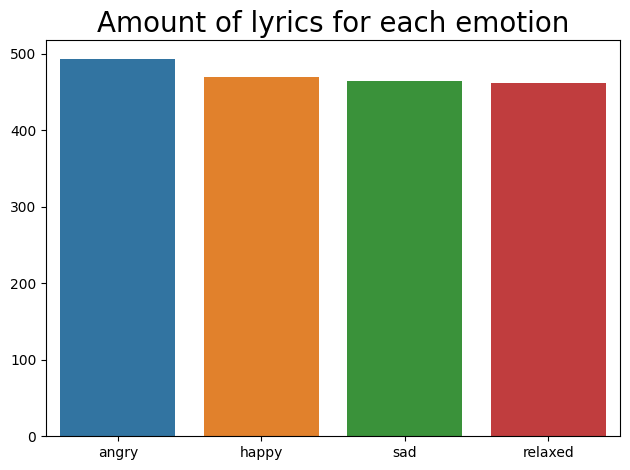

In [21]:
fig, ax = plt.subplots()
#fig.set_size_inches(10, 7)
ax = sns.barplot(x=list(moods_distribution.keys()), y=list(moods_distribution), ax=ax)
ax.set_title('Amount of lyrics for each emotion',fontsize=20)
plt.tight_layout()
plt.show()

### PCA on MoodyLyrics4Q

In [22]:
pca_dataset = en_df[['mood', 'lyric']]

# Turn emotion labels into numerical features
# { 'happy' : 0, 'sad': 1, 'relaxed': 2, 'angry': 3 }

pca_dataset['mood'].replace(['happy', 'sad', 'relaxed', 'angry'], [1, 2, 3, 4])

pca_dataset.describe()

,mood,lyric
count,1890,1890
unique,4,1881
top,angry,Faithful Lyrics[Chorus: Sample & (Common)]\nFa...
freq,493,2


In [23]:
#generate word vec - inspired by https://github.com/sgiammy/emotion-patterns-in-music-playlists
import spacy
nlp = spacy.load('en_core_web_lg')

# The language model we are using has some issues with stop words.
# Basically we need to grab stopwords from the 'en' language model
# and add them back to the model we are using.
# https://github.com/explosion/spaCy/issues/922
nlp.vocab.add_flag(lambda s: s.lower() in spacy.lang.en.stop_words.STOP_WORDS, spacy.attrs.IS_STOP)

def remove_stopwords(doc):
    tks = list(filter(lambda tk: not tk.is_stop, doc))
    return spacy.tokens.Doc(nlp.vocab, words=[tk.text for tk in tks])


In [24]:
rows = list()
pca_dataset['Vector'] = np.nan

for index, row in pca_dataset.iterrows():
    doc = nlp(row['lyric'])
    doc = remove_stopwords(doc)
    
    if len(doc.vector) == 300:
        rows.append((row['mood'], doc.vector))

pca_dataset = pd.DataFrame(rows, columns=['mood', 'Vector'])

In [25]:
pca_X_vect = pca_dataset['Vector'].to_numpy()
pca_X_vect = np.array([np.array(x) for x in pca_X_vect])

pca_y = pca_dataset['mood'].to_numpy()

In [26]:
from sklearn.decomposition import PCA

def pca(n_components, pca_X_vect):
    pca = PCA(n_components=n_components)
    pca.fit(pca_X_vect)
    return pca.transform(pca_X_vect)

In [27]:
components = pca(2, pca_X_vect)

# Put reduced components and labels together for plotting
comps = list(zip(components, pca_y))
pca_df = pd.DataFrame(comps, columns=['Vector', 'mood'])

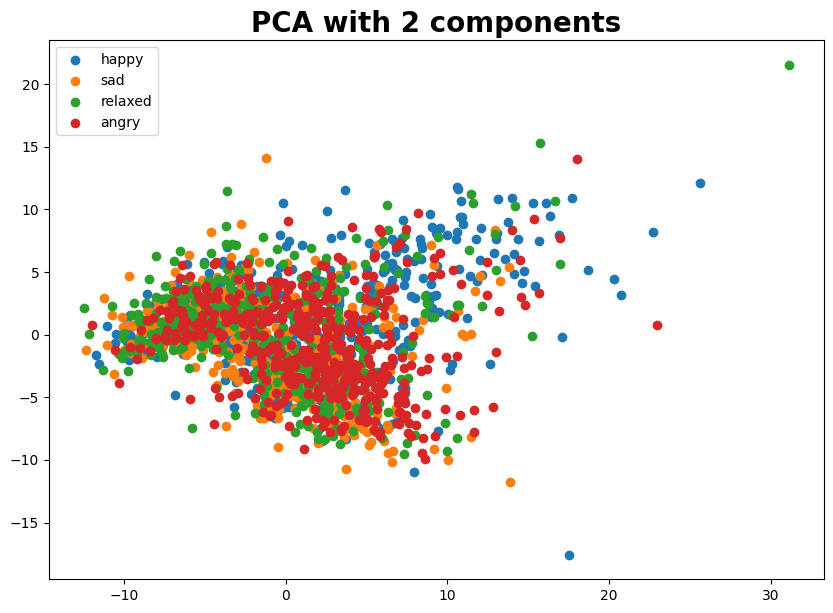

In [28]:
# Plot points for each class
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
for i in range(4):
    emo_df = pca_df[pca_df['mood'] == str(emotion_labels[i])]
    x = emo_df['Vector'].to_numpy()
    x = np.array([np.array(k) for k in x])
    plt.scatter(x[:,0], x[:,1])
plt.legend(emotion_labels)
plt.title('PCA with 2 components', weight='bold', fontsize=20)
plt.show()

# Classifiers on Lyrics Content

In [29]:

def load_dataset(df):
    rows = list()
    
    for _, row in df.iterrows():
        mood = emotion_labels_dict[row['mood']]
        
        lyric = row['lyric']
        doc = nlp(lyric)
        doc = remove_stopwords(doc)
                               
        if len(doc.vector) == 300:
            rows.append((mood, doc.vector, doc.vector_norm)) 

    return pd.DataFrame(rows, columns=['Mood', 'Vector', 'Vector_Norm'])

In [30]:
en_df.head(5)

,mood,artist,genius_artist,title,genius_title,lyric,language,instrumental,url,file_path
1,happy,George Michael,George Michael,I Want Your Sex,I Want Your Sex,I Want Your Sex Lyrics[From a PSA recorded for...,en,False,https://genius.com/George-michael-i-want-your-...,..\database\lyrics\ML1_George Michael_I Want Y...
2,angry,Rob Zombie,Rob Zombie,Pussy Liquor,Pussy Liquor,Pussy Liquor LyricsBaby :\nGimme a B\nGimme a ...,en,False,https://genius.com/Rob-zombie-pussy-liquor-lyrics,..\database\lyrics\ML2_Rob Zombie_Pussy Liquor...
3,sad,Katatonia,Katatonia,12,12,12 Lyrics[Chorus]\nBlack theatre of love\nViol...,en,False,https://genius.com/Katatonia-12-lyrics,..\database\lyrics\ML3_Katatonia_12.json
4,happy,Bing Crosby,Bing Crosby,Swinging On A Star,Swinging On a Star,Swinging On a Star Lyrics[Chorus: Bing Crosby ...,en,False,https://genius.com/Bing-crosby-swinging-on-a-s...,..\database\lyrics\ML4_Bing Crosby_Swinging On...
5,angry,Ludacris,Ludacris,Get Back,Get Back,"Get Back Lyrics[Intro]\nHeads up! (woop, woop)...",en,False,https://genius.com/Ludacris-get-back-lyrics,..\database\lyrics\ML5_Ludacris_Get Back.json


In [31]:
dataset = load_dataset(en_df)

In [32]:
dataset.head(10)

,Mood,Vector,Vector_Norm
0,0,"[0.440185, -0.51232904, 0.24144934, -0.5677669...",15.875867
1,3,"[-0.23440696, -0.11335196, -0.2807839, 0.04608...",13.925479
2,1,"[1.0219957, -1.1039473, -0.604447, -0.32562548...",15.251755
3,0,"[0.8746734, -1.2782067, 0.42677268, -0.315907,...",12.221249
4,3,"[-0.28889224, -0.7278079, 0.16769436, 0.108286...",14.732051
5,3,"[1.3004575, -0.94136864, 0.32307893, -0.341718...",18.956394
6,3,"[-0.50451356, -0.6869594, -0.00030061667, 0.24...",14.075750
7,1,"[-0.052834637, 1.8526485, -1.1167036, -0.23798...",18.352088
8,3,"[-0.027219094, -0.119360484, 0.5287755, 0.9481...",17.760180
9,0,"[0.024354385, -0.36158922, -0.39822617, 0.9622...",20.726967


In [33]:
dataset.describe()

,Mood,Vector_Norm
count,1890.000000,1890.000000
mean,1.517460,16.578835
std,1.126683,3.257690
min,0.000000,9.353445
25%,1.000000,14.671635
50%,2.000000,15.975465
75%,3.000000,17.881320
max,3.000000,46.423245


In [63]:
# Prepare array for sklearn classifiers
X_vect = dataset['Vector'].to_numpy().T
X_vect = np.array([np.array(x) for x in X_vect])

X_norm = dataset['Vector_Norm'].to_numpy()

y = dataset['Mood'].to_numpy()

## k-Nearest Neighbour

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

ks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracy = []
for k in ks:

    clf = KNeighborsClassifier(n_neighbors=k, algorithm='auto', metric='euclidean', n_jobs=-1)

    scores = cross_val_score(clf, X_vect, y, cv=10)
    print(f"Accuracy for k={k}: {round(scores.mean(), 2)} (+/- {round((scores.std() * 1.96), 2)})")
    accuracy.append(round(scores.mean(), 2))

print(f"\nMean accuracy = {round(np.mean(accuracy), 2)}")

Accuracy for k=1: 0.42 (+/- 0.06)
Accuracy for k=3: 0.44 (+/- 0.07)
Accuracy for k=5: 0.44 (+/- 0.06)
Accuracy for k=7: 0.46 (+/- 0.06)
Accuracy for k=9: 0.46 (+/- 0.06)
Accuracy for k=11: 0.45 (+/- 0.06)
Accuracy for k=13: 0.46 (+/- 0.06)
Accuracy for k=15: 0.47 (+/- 0.06)
Accuracy for k=17: 0.47 (+/- 0.08)
Accuracy for k=19: 0.46 (+/- 0.1)
Accuracy for k=21: 0.46 (+/- 0.08)

Mean accuracy = 0.45


## SVM

In [39]:
from sklearn.svm import SVC

clf = SVC()

scores = cross_val_score(clf, X_vect, y, cv=10)
print(f"Accuracy for k={k}: {round(scores.mean(), 2)} (+/- {round((scores.std() * 1.96), 2)})")

Accuracy: 0.56 (+/- 0.05)


In [41]:
from sklearn.model_selection import GridSearchCV

# Define the set of parameters we want to test on
params = [
    { 'kernel': ['linear'], 'C': [ 0.01, 0.05, 1, 10, 100 ]},
    { 'kernel': ['rbf', 'sigmoid'], 'C': [ 0.01, 0.05, 0.1, 0.3, 0.8, 1, 3, 10, 50, 100, 150, 200 ] }
]

gs = GridSearchCV(SVC(), params, cv=10, n_jobs=-1, verbose=False)
gs.fit(X_vect, y) 

svm_best = gs.best_estimator_
best_params = gs.best_params_
print('Best parameters:', best_params)

Best parameters: {'C': 0.01, 'kernel': 'linear'}


In [42]:
scores = cross_val_score(svm_best, X_vect, y, cv=10)
print(f"Accuracy for k={k}: {round(scores.mean(), 2)} (+/- {round((scores.std() * 1.96), 2)})")

Accuracy for k=21: 0.58 (+/- 0.05)


## Artifical Neural Network

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size = 0.2, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [75]:
# y_nn should be a vector (len(X_vect),4), with a 1 in the right class
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
y_nn = np_utils.to_categorical(encoded_Y)

encoded_Y_val = encoder.transform(y_val)
y_nn_val = np_utils.to_categorical(encoded_Y_val)

In [76]:
#2 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we need to scale because we don't want one feature to predomine the others
# Standardize features by removing the mean and scaling to unit variance
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [96]:
import keras

def build_ann(optimizer='adam', input_size=300, dense_size = 60, output_size = 4, dropout = 0.5):
    model = keras.models.Sequential(
        [
            keras.layers.Dense(units = input_size, activation = 'sigmoid', input_dim = input_size),
            keras.layers.Dropout(dropout),
            keras.layers.Dense(units = dense_size, activation = 'sigmoid'),
            keras.layers.Dropout(dropout),
            keras.layers.Dense(units = output_size, activation = 'softmax')
        ])
    
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [97]:
classifier = build_ann('adam')
history = classifier.fit(X_train, y_nn, validation_data=(X_val,y_nn_val), batch_size = 64, epochs = 50)

Epoch 1/50
24/24 [==============================] - 1s 11ms/step - loss: 1.4460 - accuracy: 0.3161 - val_loss: 1.2874 - val_accuracy: 0.4392
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 1.3065 - accuracy: 0.4107 - val_loss: 1.2534 - val_accuracy: 0.4392
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.2286 - accuracy: 0.4431 - val_loss: 1.2325 - val_accuracy: 0.4815
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 1.1663 - accuracy: 0.4894 - val_loss: 1.1947 - val_accuracy: 0.4656
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 1.1495 - accuracy: 0.4788 - val_loss: 1.1715 - val_accuracy: 0.4656
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0897 - accuracy: 0.5370 - val_loss: 1.1418 - val_accuracy: 0.4921
Epoch 7/50
24/24 [==============================] - 0s 7ms/step - loss: 1.0811 - accuracy: 0.5351 - val_loss: 1.1275 - val_accuracy: 0.4762
Epoch 8/50
24/24 [=

In [131]:
def plot_acc_loss (history):
    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
plot_acc_loss(history)

In [99]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
y_pred1 = np.argmax(y_pred,axis=1)
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
y_nn_pred = np_utils.to_categorical(encoded_Y)

cm = confusion_matrix(y_pred1, y_nn_pred.argmax(axis=1))

accuracy = (sum([cm[i,i] for i in range(len(cm))])) / len(y_nn_pred)
print(f'Accuracy: {round(accuracy*100, 2)}')

6/6 [==============================] - 0s 2ms/step
Accuracy: 60.32


In [143]:
def draw_cm(cm):
    conf_matrix = np.asarray(cm)
    fig, ax = plt.subplots()
    sns.heatmap(conf_matrix, annot = True,
                yticklabels = emotion_labels,
                xticklabels = emotion_labels)

    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()

In [ ]:
draw_cm(cm)

# Considering title + lyric

In [111]:
# Prepare array for sklearn classifiers
X_vect = dataset['Vector'].to_numpy()
X_vect = np.array([np.array(x) for x in X_vect])

#X_vect_title
#pca = PCA(n_components=4)
#pca.fit(X_vect_pca)
#X_vect_comb = pca.transform(X_vect_pca)

X_vect_nl = list()

for (i, (index,row)) in enumerate(en_df.iterrows()):
    song_title = row['genius_title']
    title_doc = nlp(str(song_title))
    X_vect_nl.append(np.concatenate((X_vect[i], title_doc.vector)))
    
X_vect_nl = np.array(X_vect_nl)

In [112]:
X_vect_nl.shape

(1890, 600)

# KNN


In [150]:
ks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracy = []
for k in ks:

    clf = KNeighborsClassifier(n_neighbors=k, algorithm='auto', metric='euclidean', n_jobs=-1)

    scores = cross_val_score(clf, X_vect_nl, y, cv=10)
    print(f"Accuracy for k={k}: {round(scores.mean(), 2)} (+/- {round((scores.std() * 1.96), 2)})")
    accuracy.append(round(scores.mean(), 2))

print(f"\nMean accuracy = {round(np.mean(accuracy), 2)}")

Accuracy for k=1: 0.33 (+/- 0.03)
Accuracy for k=3: 0.34 (+/- 0.06)
Accuracy for k=5: 0.35 (+/- 0.04)
Accuracy for k=7: 0.35 (+/- 0.07)
Accuracy for k=9: 0.34 (+/- 0.08)
Accuracy for k=11: 0.35 (+/- 0.07)
Accuracy for k=13: 0.35 (+/- 0.07)
Accuracy for k=15: 0.36 (+/- 0.06)
Accuracy for k=17: 0.35 (+/- 0.05)
Accuracy for k=19: 0.34 (+/- 0.06)
Accuracy for k=21: 0.36 (+/- 0.07)

Mean accuracy = 0.35


# SVM

In [113]:
clf = SVC()

scores = cross_val_score(clf, X_vect_nl, y, cv=10)
print(f"Accuracy for k={k}: {round(scores.mean(), 2)} (+/- {round((scores.std() * 1.96), 2)})")



Accuracy for k=21: 0.47 (+/- 0.06)


In [119]:
gs = GridSearchCV(SVC(), params, cv=10, n_jobs=-1, verbose=False)
gs.fit(X_vect, y) 

svm_best = gs.best_estimator_
best_params = gs.best_params_
print(f'Best parameters: {best_params}\n')

scores = cross_val_score(svm_best, X_vect_nl, y, cv=10)
print(f"Accuracy for k={k}: {round(scores.mean(), 2)} (+/- {round((scores.std() * 1.96), 2)})")

Best parameters: {'C': 0.01, 'kernel': 'linear'}

Accuracy for k=21: 0.51 (+/- 0.04)


# ANN

In [121]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_vect_nl_ann = sc.fit_transform(X_vect_nl)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_vect_nl, y, test_size = 0.2, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [123]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(1512, 600)
(189, 600)
(189, 600)
(1512,)
(189,)
(189,)


In [127]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
y_nn = np_utils.to_categorical(encoded_Y)

encoded_Y_val = encoder.transform(y_val)
y_nn_val = np_utils.to_categorical(encoded_Y_val)

In [128]:
print(y_nn.shape)
print(y_nn_val.shape)

(1512, 4)
(189, 4)


In [147]:
model = build_ann(optimizer='adam', input_size=600, dense_size = 60, output_size = 4, dropout = 0.5)
history = model.fit(X_train, y_nn, validation_data=(X_val,y_nn_val), batch_size = 64, epochs = 50)

Epoch 1/50
24/24 [==============================] - 1s 14ms/step - loss: 1.4735 - accuracy: 0.2837 - val_loss: 1.3075 - val_accuracy: 0.4497
Epoch 2/50
24/24 [==============================] - 0s 8ms/step - loss: 1.2951 - accuracy: 0.3882 - val_loss: 1.2740 - val_accuracy: 0.3968
Epoch 3/50
24/24 [==============================] - 0s 7ms/step - loss: 1.2257 - accuracy: 0.4365 - val_loss: 1.2357 - val_accuracy: 0.4656
Epoch 4/50
24/24 [==============================] - 0s 7ms/step - loss: 1.1719 - accuracy: 0.4749 - val_loss: 1.2082 - val_accuracy: 0.4392
Epoch 5/50
24/24 [==============================] - 0s 7ms/step - loss: 1.1186 - accuracy: 0.5040 - val_loss: 1.1963 - val_accuracy: 0.4762
Epoch 6/50
24/24 [==============================] - 0s 7ms/step - loss: 1.0796 - accuracy: 0.5304 - val_loss: 1.1922 - val_accuracy: 0.4656
Epoch 7/50
24/24 [==============================] - 0s 9ms/step - loss: 1.0393 - accuracy: 0.5549 - val_loss: 1.1771 - val_accuracy: 0.4444
Epoch 8/50
24/24 [=

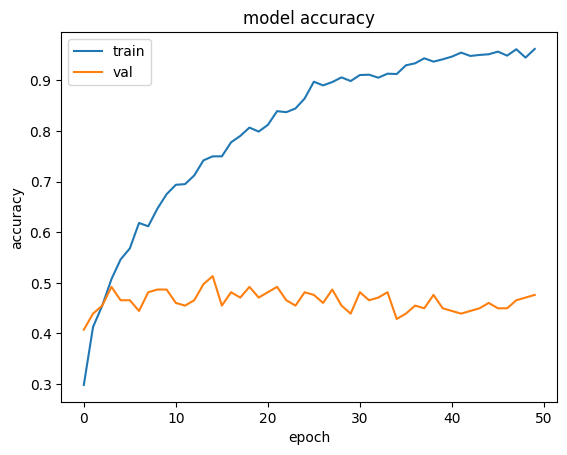

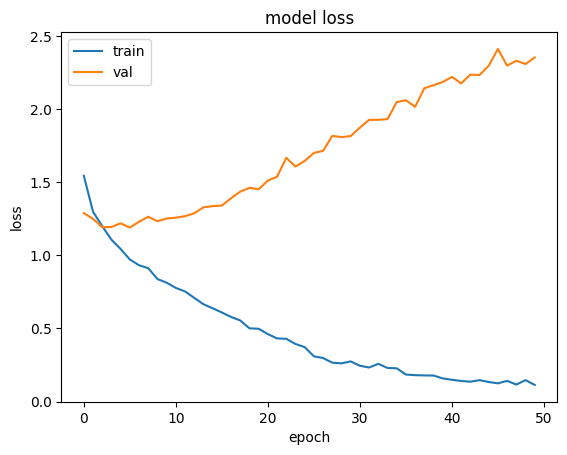

In [146]:
plot_acc_loss(history)

In [148]:
y_pred = model.predict(X_test)
y_pred1 = np.argmax(y_pred,axis=1)
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
y_nn_pred = np_utils.to_categorical(encoded_Y)

cm = confusion_matrix(y_pred1, y_nn_pred.argmax(axis=1))

accuracy = (sum([cm[i,i] for i in range(len(cm))])) / len(y_nn_pred)
print(f'Accuracy: {round(accuracy*100, 2)}')

6/6 [==============================] - 0s 2ms/step
Accuracy: 52.38


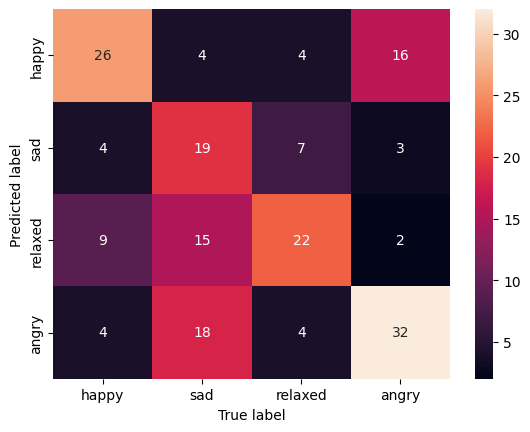

In [149]:
draw_cm(cm)